In [49]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from solutions.utils.constants import FRONTIER_COUNT, FRONTIER_FEATURES, ACTION_SPACE, OTHER_FRONTIER_INPUTS

In [50]:
Q = torch.load("data/Q_function_11.pth", map_location=torch.device('cpu'), weights_only=False)
Q2 = torch.load("data/Q_function_7.pth", map_location=torch.device('cpu'), weights_only=False)

In [51]:
keys = [
    'size',
    'count',
    'distance',
    'repulsion_angle',
    'direction_angle',
    'distance_last'
]
keys.sort()
keys

['count',
 'direction_angle',
 'distance',
 'distance_last',
 'repulsion_angle',
 'size']

In [52]:
def multi_input1(x):
    output = torch.zeros(ACTION_SPACE,device=x.device, dtype=x.dtype)
    for i in range(ACTION_SPACE):
        input = torch.zeros(FRONTIER_FEATURES+OTHER_FRONTIER_INPUTS, device=x.device, dtype=x.dtype)
        for j in range(ACTION_SPACE):
            input[j] = x[j*FRONTIER_FEATURES+i]
        for j in range(OTHER_FRONTIER_INPUTS):
            input[FRONTIER_FEATURES+j] = x[ACTION_SPACE*FRONTIER_FEATURES+j]
        output[i] = Q(input)[0]
    return output

def multi_input2(x):
    output = torch.zeros(ACTION_SPACE,device=x.device, dtype=x.dtype)
    for i in range(ACTION_SPACE):
        input = torch.zeros(FRONTIER_FEATURES+OTHER_FRONTIER_INPUTS, device=x.device, dtype=x.dtype)
        for j in range(ACTION_SPACE):
            input[j] = x[j*FRONTIER_FEATURES+i]
        for j in range(OTHER_FRONTIER_INPUTS):
            input[FRONTIER_FEATURES+j] = x[ACTION_SPACE*FRONTIER_FEATURES+j]
        output[i] = Q2(input)[0]
    return output

policy1 = multi_input1
policy2 = multi_input2

In [53]:
actions = np.zeros(6)
for _ in range(1000):
    obs = torch.tensor(np.random.random(39), dtype=torch.float32)
    obs[-3] = 0.5
    obs[-2] = 0.01
    obs[-1] = 0.2
    with torch.no_grad():
        out = policy1(obs).cpu().numpy()
        actions[np.argmax(out)] += 1
print(actions)

[179. 162. 179. 177. 143. 160.]


In [54]:
total_exp = []
total_values1 = []
total_values2 = []

for k in range(FRONTIER_FEATURES):
    exp = []
    reward1 = []
    reward2 = []
    for i in range(100): 
        e =  (i/100)
        exp.append(e)
        
        obs = torch.tensor(np.zeros(39), dtype=torch.float32)
        for i in range(k,k+1):
            obs[FRONTIER_COUNT*i+0] = 1
        obs[-3] = e
        obs[-2] = 0.05
        obs[-1] = 0.6
        with torch.no_grad():
            out1 = policy1(obs)
            out2 = policy2(obs)
            reward1.append(out1.cpu().numpy())
            reward2.append(out2.cpu().numpy())
    
    total_exp.append(exp)
    total_values1.append(reward1)
    total_values2.append(reward2)
    
total_exp = np.array(total_exp)
total_values1 = np.array(total_values1)
total_values2 = np.array(total_values2)
        

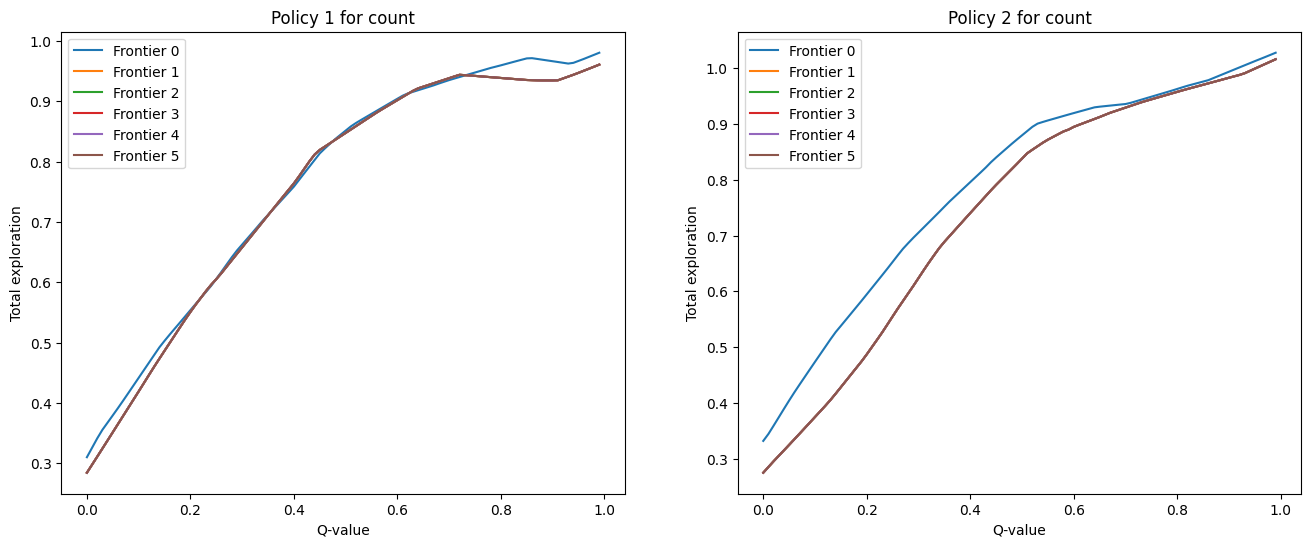

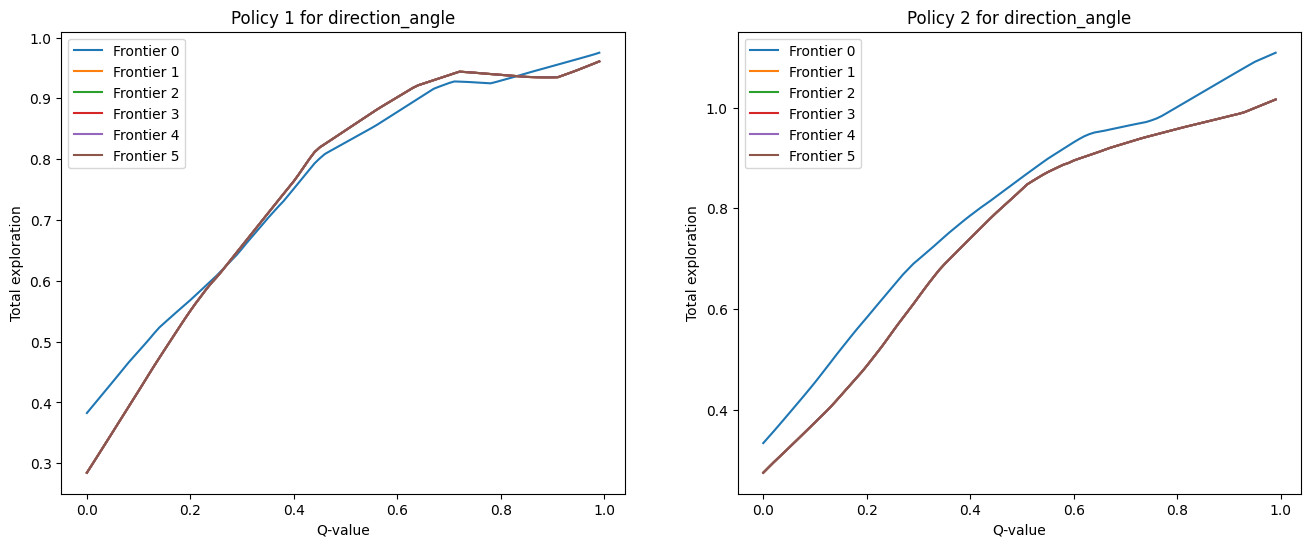

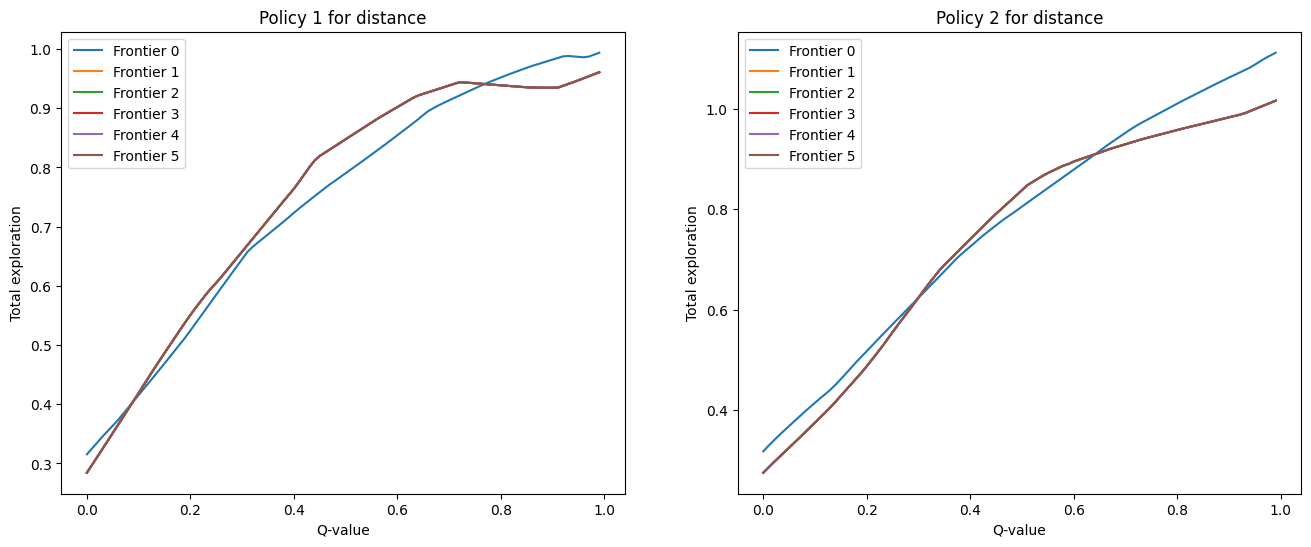

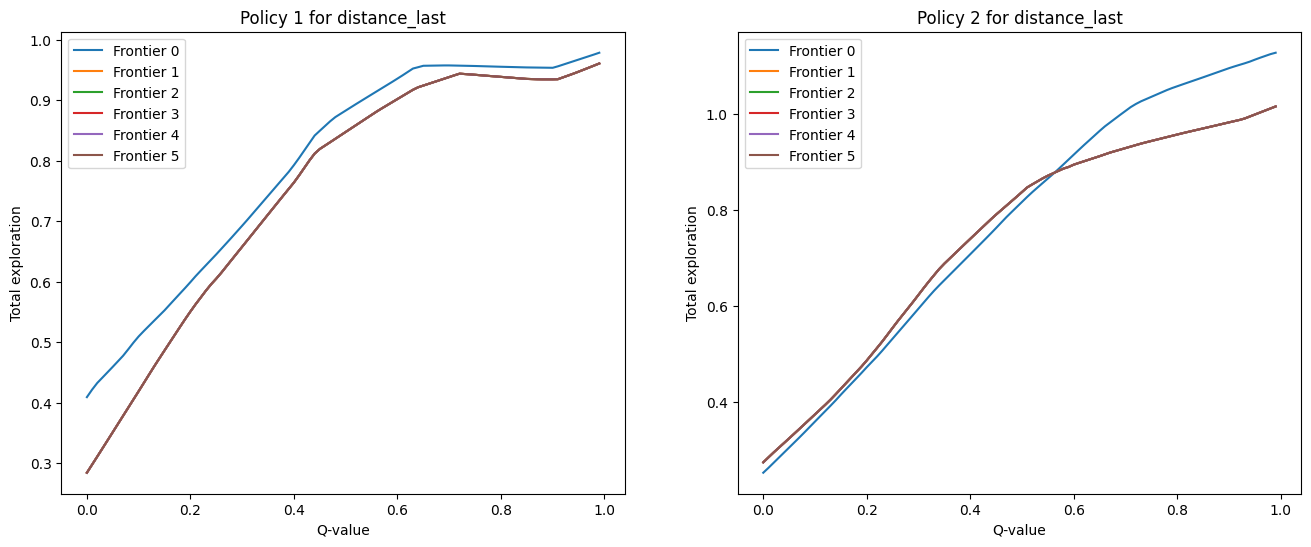

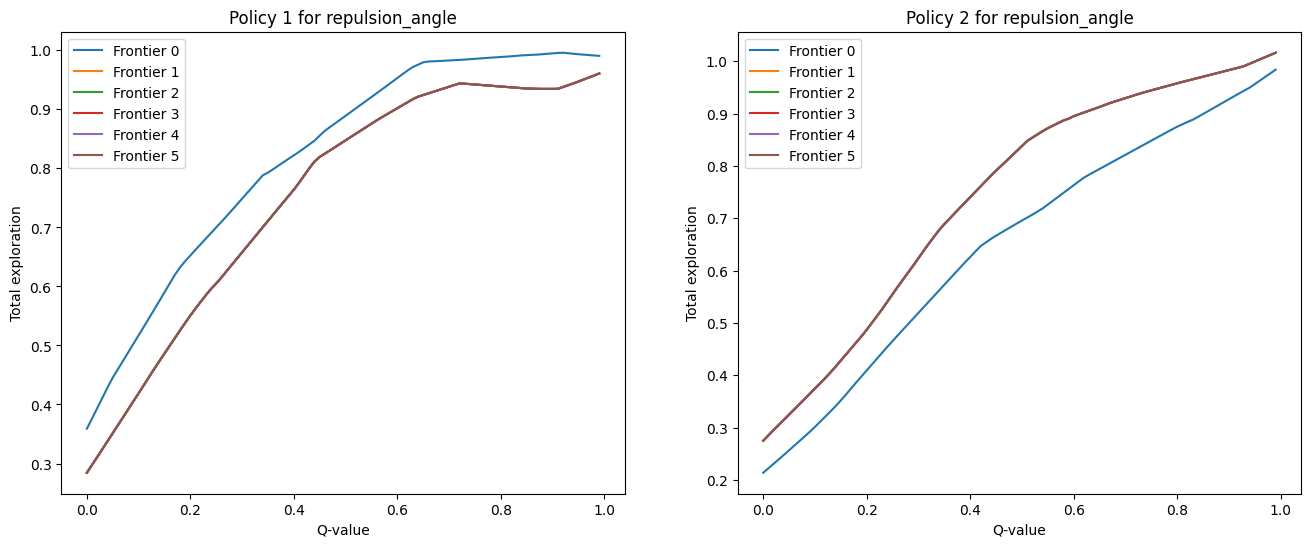

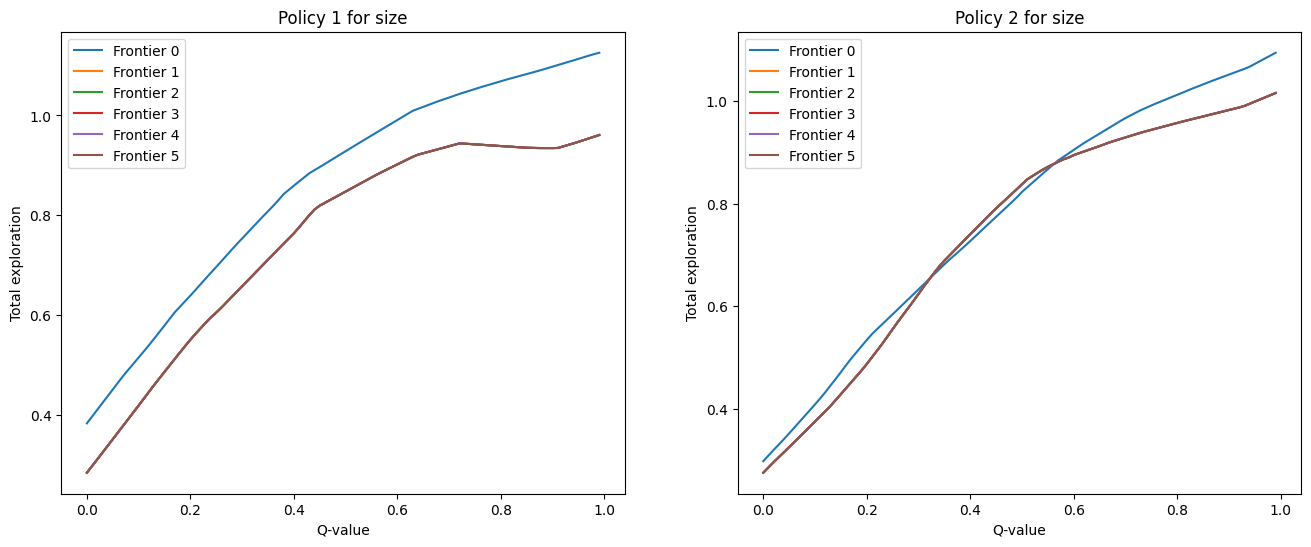

In [57]:
for k,(exp,values1,values2) in enumerate(zip(total_exp,total_values1,total_values2)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    for i in range(FRONTIER_COUNT):
        ax1.plot(exp,values1[:,i],label=f"Frontier {i}")
        ax2.plot(exp,values2[:,i],label=f"Frontier {i}")
    ax1.legend()
    ax2.legend()
    
    ax1.set_title(f"Policy 1 for {keys[k]}")
    ax2.set_title(f"Policy 2 for {keys[k]}")
    
    ax1.set_xlabel("Q-value")
    ax1.set_ylabel("Total exploration")
    ax2.set_xlabel("Q-value")
    ax2.set_ylabel("Total exploration")
plt.show()

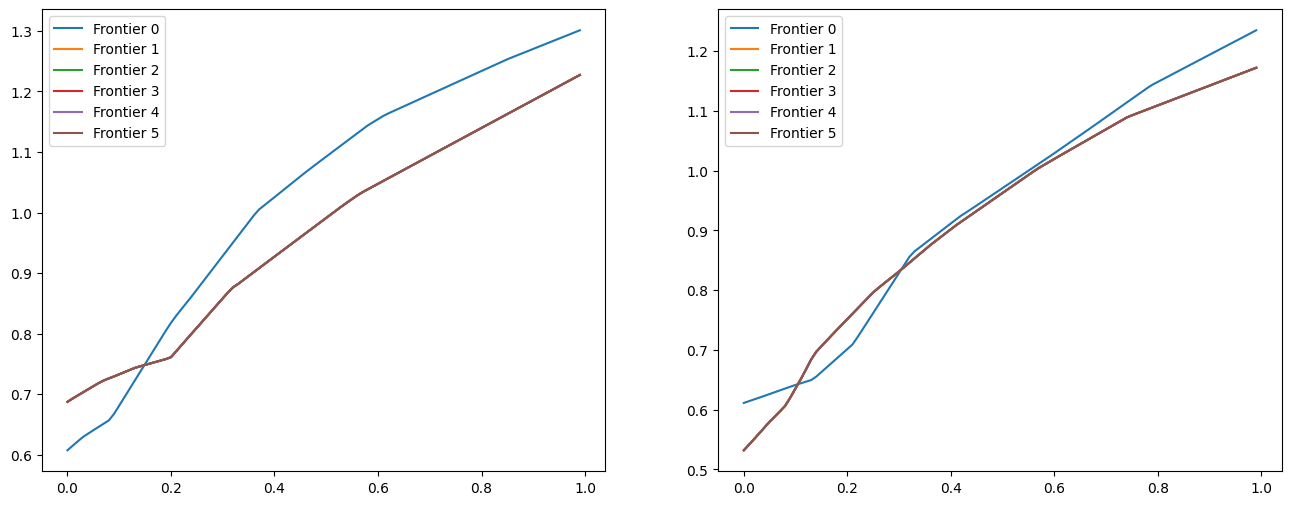

In [56]:

exp = []
reward1 = []
reward2 = []
for i in range(100): 
    e =  (i/100)
    exp.append(e)
    
    obs = torch.tensor(np.zeros(39), dtype=torch.float32)
    for i in range(FRONTIER_FEATURES):
        obs[FRONTIER_COUNT*i+0] = 1
    obs[-3] = 0.5
    obs[-2] = 0.1
    obs[-1] = e
    with torch.no_grad():
        out1 = policy1(obs)
        out2 = policy2(obs)
        reward1.append(out1.cpu().numpy())
        reward2.append(out2.cpu().numpy())
        
reward1 = np.array(reward1)
reward2 = np.array(reward2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for i in range(FRONTIER_COUNT):
    ax1.plot(exp,reward1[:,i],label=f"Frontier {i}")
    ax2.plot(exp,reward2[:,i],label=f"Frontier {i}")
ax1.legend()
ax2.legend()

plt.show()

